In [7]:
from easydict import EasyDict as edict

In [9]:
a = edict({'abb':1, 'sad':2})

# utils

## Accumulator
- 累加器，用来存放所有需要累加的变量，节省代码行数

In [1]:
from tools.utils import Accumulator
a = Accumulator(3)  # 创建一个有三个元素的累加器，默认从0开始索引
aa = Accumulator(2, ['a', 'b'])  # 创建一个有两个元素的累加器，可以使用指定的names进行索引
def test_Accumulator():
    print('1:', aa)
    print('2:', aa[0], aa['a']) # 既可以使用数值索引也可以使用name进行索引
    aa.add(2, 4) # 按顺序依次累加
    print('3:', aa)
    aa.add({'a': 1, 'b': 3}) # 按所给名字累加
    print('4:', aa)
    aa[0], aa['b'] = 1, 4
    print('5:', aa)
test_Accumulator()

1: a(0):0.0, b(1):0.0
2: 0.0 0.0
3: a(0):2.0, b(1):4.0
4: a(0):3.0, b(1):7.0
5: a(0):1, b(1):4


## Timer & Animator

- Timer计时器：顾名思义就是计时，每次start和stop一次都会记录一个时间，可以计算所记录时间的平均值、总时间和累计时间等。
- Animator动画器：使用动画实时显示新增数据，可以支持多幅图像。

100%|██████████| 5/5 [00:32<00:00,  6.55s/it]


loss 0.063, final train acc 0.351, final valid acc 0.301
1276683.421 examples/sec on cuda
0.001 sec/epoch on cuda


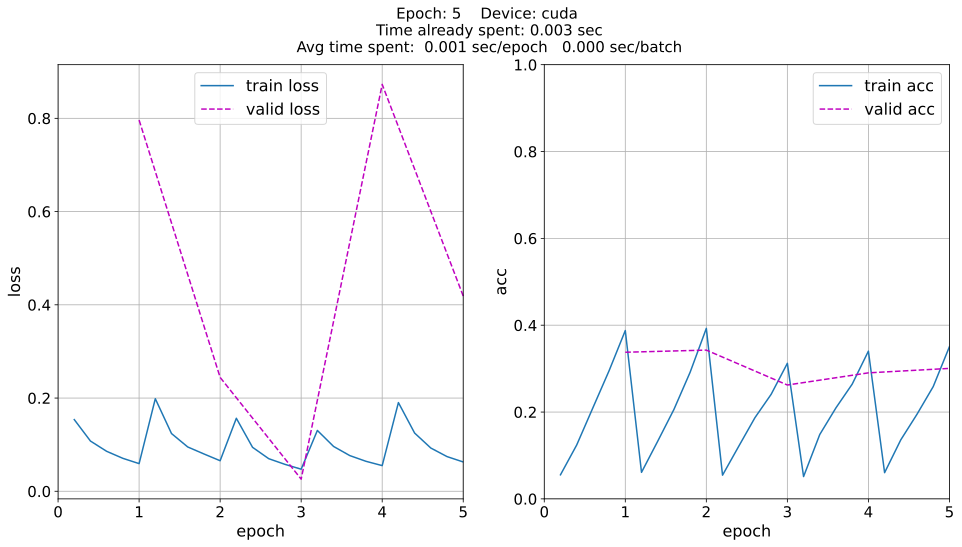

In [3]:
from tools.utils import Timer, Animator, Accumulator
import numpy as np
from tqdm import tqdm

num_epochs = 5
num_batches = 20
batch_size = 32
device = 'cuda'
timer = Timer()
animator = Animator(legends=[('train loss', 'valid loss'), ('train acc', 'valid acc')],
                    nrows=1, ncols=2, figsize=(16, 8),
                    xlabels=['epoch' for _ in range(2)],
                    ylabels=['loss', 'acc'],
                    xlims=[(0, num_epochs) for _ in range(2)],
                    ylims=[None, (0, 1)])
recorder = Accumulator(3, ["sum_loss", "sum_acc", "num_exaples"])
l, acc = 10, 0
for epoch in tqdm(range(num_epochs)):
    # 存储3个指标：sum of train loss, acc, number of examples
    recorder.reset()
    if epoch != 0:
        time_per_epoch = timer.sum()/epoch
    else:
        time_per_epoch = -1
    animator.set_suptitle(
        f'Epoch: {epoch+1}    Device: {device} \nTime already spent: {timer.sum():.3f} sec\nAvg time spent:  {time_per_epoch:.3f} sec/epoch  {timer.avg(): .3f} sec/batch')
    for i in range(num_batches):
        timer.start()
        # time.sleep(0.001)
        loss, acc = np.random.rand() * num_batches / (i+1), batch_size * \
            (np.random.rand() * 0.5 + 0.5) * i / num_batches
        recorder.add(loss, acc, batch_size)
        timer.stop()
        animator.set_suptitle(
         f'Epoch: {epoch+1}    Device: {device} \nTime already spent: {timer.sum():.3f} sec\nAvg time spent:  {time_per_epoch:.3f} sec/epoch  {timer.avg(): .3f} sec/batch')
        if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
            animator.add(1, 1, epoch + (i + 1) / num_batches,
                         (recorder["sum_loss"] / recorder["num_exaples"], None))
            animator.add(1, 2, epoch + (i + 1) / num_batches,
                         (recorder["sum_acc"] / recorder["num_exaples"], None))
    valid_loss = loss + 0.01
    valid_acc = recorder["sum_acc"] / recorder["num_exaples"] - 0.05
    animator.add(1, 1, epoch + 1, (None, valid_loss))
    animator.add(1, 2, epoch + 1, (None, valid_acc))

# 统计一下最终训练效果
print(f'loss {recorder["sum_loss"] / recorder["num_exaples"]:.3f}, final train acc {recorder["sum_acc"] / recorder["num_exaples"]:.3f}, final valid acc {valid_acc:.3f}')
print(f'{recorder["num_exaples"] * num_epochs / timer.sum():.3f} examples/sec on {device}')
print(f'{timer.sum() / num_epochs:.3f} sec/epoch on {device}')
animator.set_suptitle(
    f'Epoch: {num_epochs}    Device: {device} \nTime already spent: {timer.sum():.3f} sec\nAvg time spent:  {timer.sum()/num_epochs:.3f} sec/epoch  {timer.avg(): .3f} sec/batch')
